# CARDIOVASCULAR DISEASE - CLASSIFICATION TECHNIQUES

This is a dataset containing 12 explanatory variables describing patients.
data set available at this link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

Here I will compare several classification techniques:

Random Forest model

SVC model 

KNN model


Data features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('cardio_train.csv',delimiter = ';',index_col= 'id')
train.head(n = 10).style.background_gradient(cmap = "Oranges")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,17474,1,156,56.000000,100,60,1,1,0,0,0,0
8,21914,1,151,67.000000,120,80,2,2,0,0,0,0
9,22113,1,157,93.000000,130,80,3,1,0,0,1,0
12,22584,2,178,95.000000,130,90,3,3,0,0,1,1
13,17668,1,158,71.000000,110,70,1,1,0,0,1,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


<AxesSubplot:ylabel='id'>

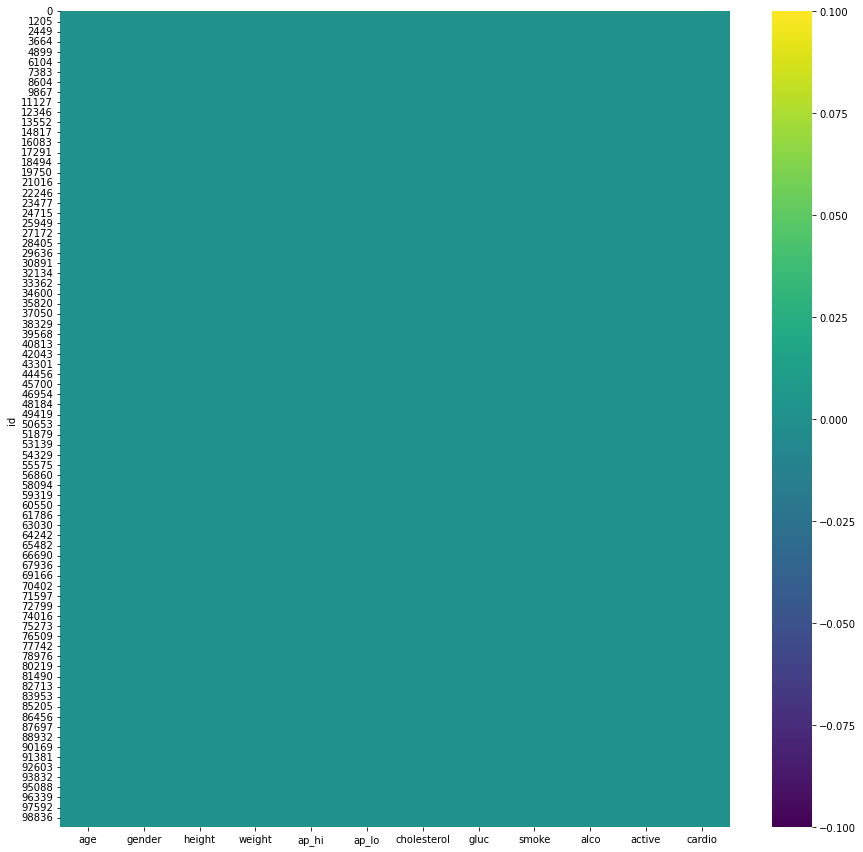

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')

Adding two useful columns: body mass index and blood pressure category

In [5]:
train.insert(8, 'bmi', round((train['weight']/(train['height']/100)**2), 2))

In [6]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 0
    elif x<=129 and y<=80:
        return 1
    elif x<=139 or y<=89:
        return 2
    elif x<=180 or y<=120:
        return 3
    elif x>180 or y>120:
        return 4
    else:
        return None
    
train.insert(8, "bp_cat", train.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
train['bp_cat'].value_counts()

0    39057
2    15392
3    15053
1      421
4       77
Name: bp_cat, dtype: int64

In [8]:
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,bp_cat,bmi,smoke,alco,active,cardio
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,21.97,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,3,34.93,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,2,23.51,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,3,28.71,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,23.01,0,0,0,0


In [9]:
train.duplicated().sum()

24

In [10]:
train.drop_duplicates(inplace=True)

In [12]:
train.corr().style.background_gradient(cmap = "magma")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,bp_cat,bmi,smoke,alco,active,cardio
age,1.000000,-0.022763,-0.081546,0.053697,0.020765,0.017647,0.154432,0.098704,0.188337,0.085535,-0.047650,-0.029735,-0.009918,0.238189
gender,-0.022763,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.040842,-0.096639,0.338131,0.170950,0.005917,0.008037
height,-0.081546,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,-0.013394,-0.290653,0.188003,0.094425,-0.006569,-0.010871
weight,0.053697,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.263898,0.761980,0.067725,0.067071,-0.016863,0.181599
ap_hi,0.020765,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,0.104436,0.024842,-0.000928,0.001403,-0.000031,0.054475
ap_lo,0.017647,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.149326,0.035331,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154432,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.226894,0.146187,0.010298,0.035718,0.009927,0.221119
gluc,0.098704,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,0.102335,0.101330,-0.004799,0.011214,-0.006761,0.089268
bp_cat,0.188337,0.040842,-0.013394,0.263898,0.104436,0.149326,0.226894,0.102335,1.000000,0.239246,0.033610,0.043335,0.002959,0.442920
bmi,0.085535,-0.096639,-0.290653,0.761980,0.024842,0.035331,0.146187,0.101330,0.239246,1.000000,-0.027277,0.014347,-0.014264,0.165597


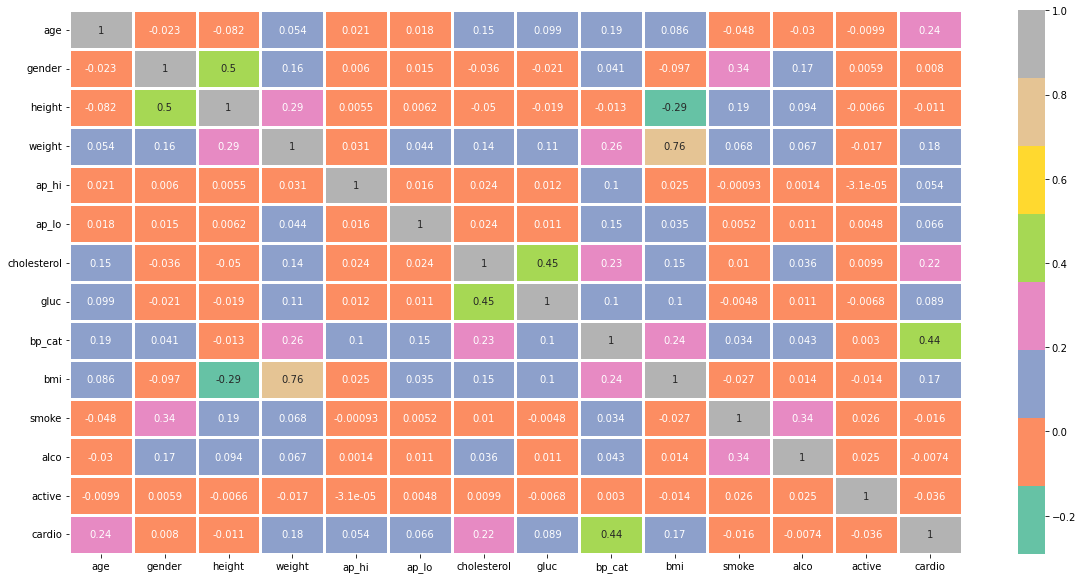

In [13]:
plt.figure(figsize = [20, 10], clear = True, facecolor = "white")
sns.heatmap(train.corr(), annot = True, square = False, linewidths = 3,linecolor = "white", cmap = "Set2");

In [14]:
train['age'] = train['age']/365   #converting the age in years

In [15]:
train['age'].describe()

count    69976.000000
mean        53.339589
std          6.759930
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age, dtype: float64

<AxesSubplot:xlabel='Count', ylabel='age'>

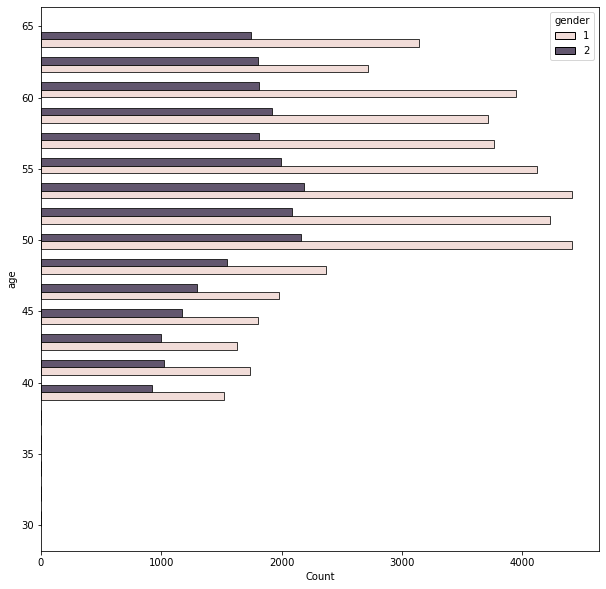

In [16]:
plt.figure(figsize = [10, 10], clear = True)
sns.histplot(y='age',data=train,bins=20,hue='gender',multiple='dodge',shrink=.6)

In [17]:
train['height'].describe()

count    69976.000000
mean       164.359152
std          8.211218
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [18]:
train['height'].describe()

count    69976.000000
mean       164.359152
std          8.211218
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [19]:
train['ap_hi'].describe()

count    69976.000000
mean       128.820453
std        154.037729
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [20]:
#keeping range from 0 to 220
train = train[(train['ap_hi'] > 0) & (train['ap_hi']<=220)]

<AxesSubplot:xlabel='Count', ylabel='ap_hi'>

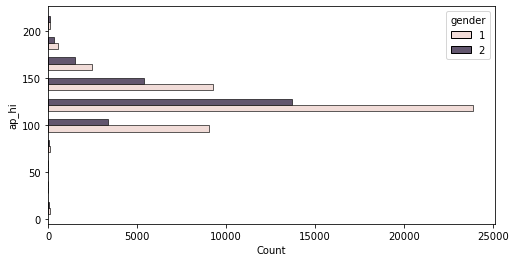

In [21]:
plt.figure(figsize = [8, 4], clear = True)
sns.histplot(y='ap_hi',data=train,bins=10,hue='gender',multiple='dodge',shrink=.6)

In [22]:
train['ap_lo'].describe()

count    69921.000000
mean        96.652637
std        188.575430
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [23]:
#keeping range from 0 to 200
train = train[(train['ap_lo'] > 0) & (train['ap_lo']<=200)]

<AxesSubplot:xlabel='Count', ylabel='ap_lo'>

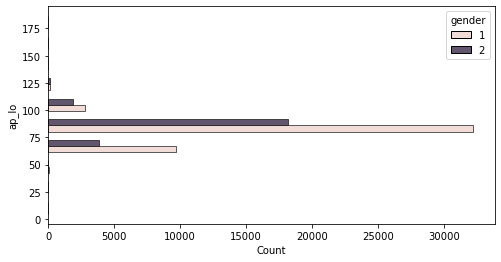

In [24]:
plt.figure(figsize = [8, 4], clear = True)
sns.histplot(y='ap_lo',data=train,bins=10,hue='gender',multiple='dodge',shrink=.6)

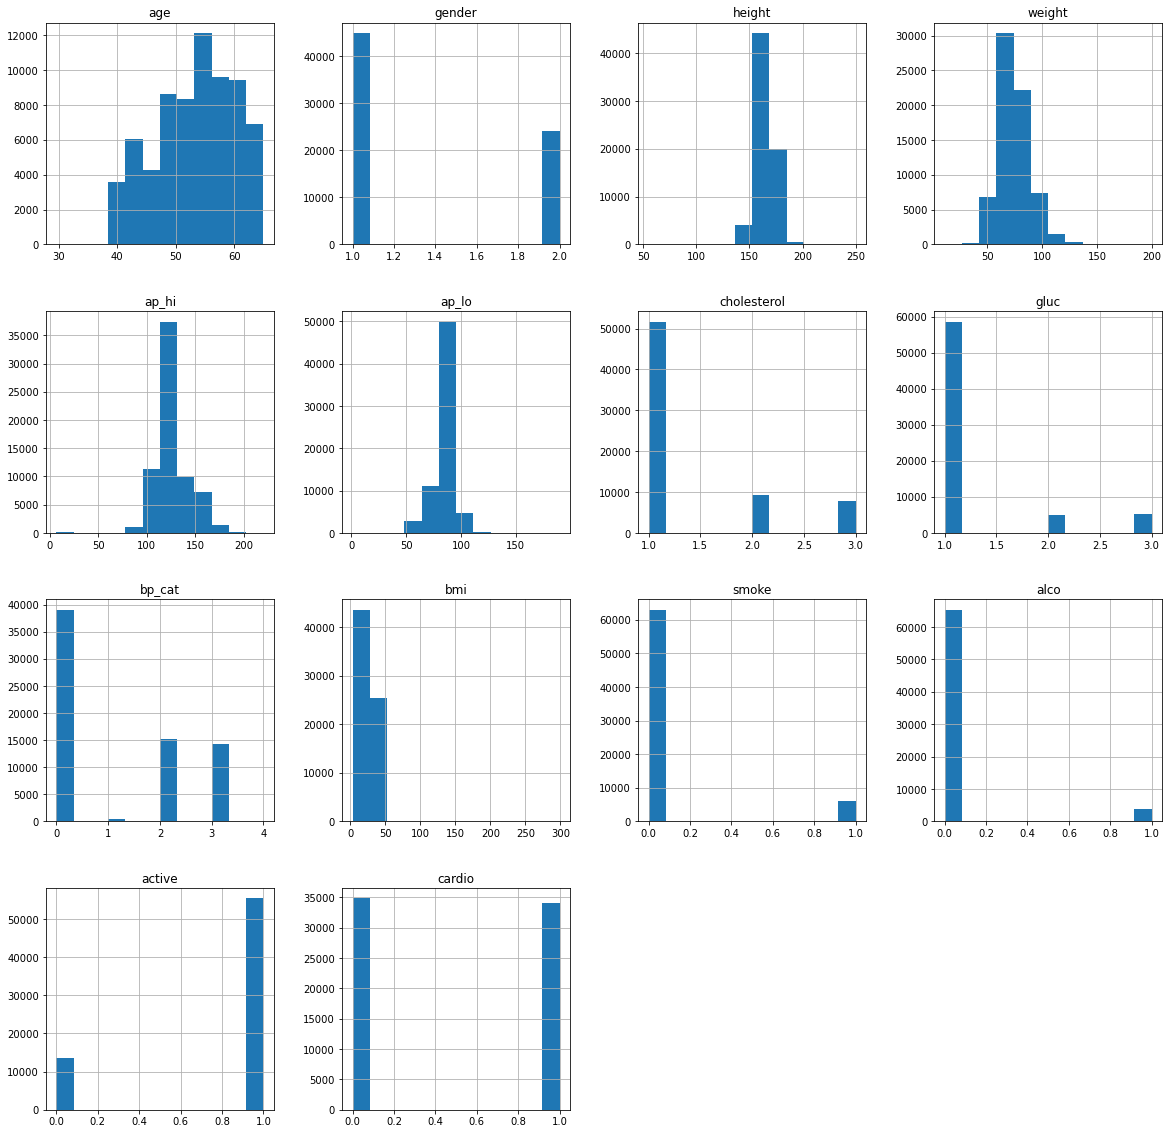

In [26]:
train.hist(figsize = (20, 20), bins = 12, legend = False);

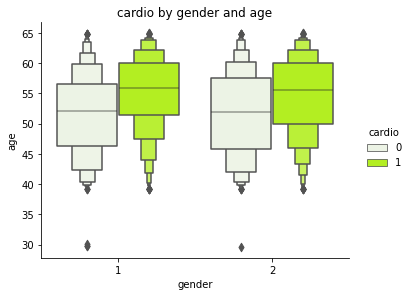

In [29]:
sns.catplot(x = "gender",
            y = "age",
            hue = "cardio",
            kind = "boxen",
            color = '#B3EE22',
            data = train, saturation = 1, height = 4, aspect = 1.3,
            margin_titles = True).set(title = "cardio by gender and age");

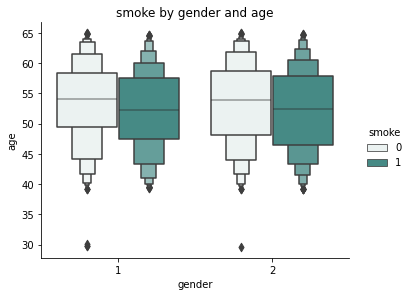

In [30]:
sns.catplot(x = "gender",
            y = "age",
            hue = "smoke",
            kind = "boxen",
            color = '#468A85',
            data = train, saturation = 1, height = 4, aspect = 1.3,
            margin_titles = True).set(title = "smoke by gender and age");

In [32]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install prettytable
from prettytable import PrettyTable
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

Select Dependent (label) and Independent (estimator) Variables

In [33]:
# select dependent variable (label)
y = train["cardio"]

# select independent variable (estimator)
X = train.drop("cardio", axis = 1)

Split the Dataset into Train and Test Sets


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Standardization process

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest model

In [36]:
rf_model = RandomForestClassifier(n_estimators = 1000,max_depth=10,random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

Classification report of model

In [37]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10395
           1       0.76      0.69      0.72     10291

    accuracy                           0.74     20686
   macro avg       0.74      0.74      0.74     20686
weighted avg       0.74      0.74      0.74     20686



[[8122 2273]
 [3186 7105]]


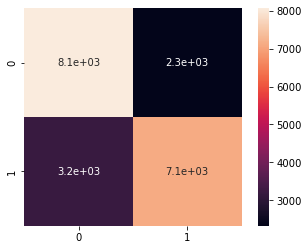

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()

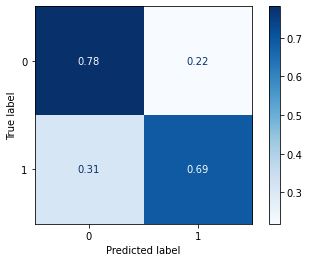

In [39]:
plot_confusion_matrix(rf_model, X_test, y_test, cmap = plt.cm.Blues, normalize = "true")

Support Vector Classifier model


In [40]:
svc_model = SVC()

In [41]:
svc_model.fit(X_train,y_train)

SVC()

Classification report of model

In [42]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10395
           1       0.73      0.69      0.71     10291

    accuracy                           0.72     20686
   macro avg       0.72      0.72      0.72     20686
weighted avg       0.72      0.72      0.72     20686



[[7780 2615]
 [3156 7135]]


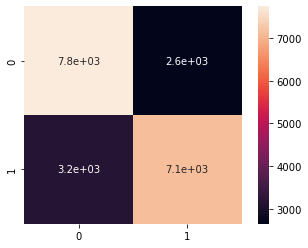

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()

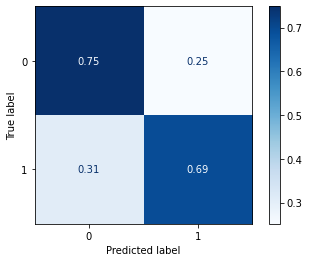

In [44]:
plot_confusion_matrix(svc_model, X_test, y_test, cmap = plt.cm.Blues, normalize = "true")

K Neighbors Classifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred = knn.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64     10395
           1       0.64      0.63      0.64     10291

    accuracy                           0.64     20686
   macro avg       0.64      0.64      0.64     20686
weighted avg       0.64      0.64      0.64     20686



[[6718 3677]
 [3769 6522]]


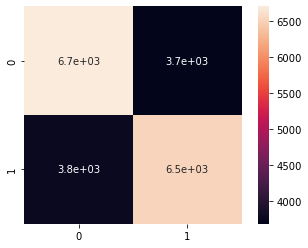

In [49]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()

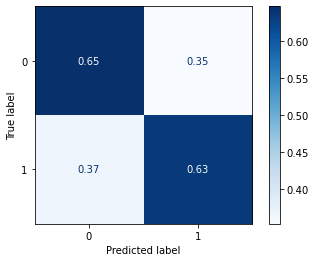

In [50]:
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues, normalize = "true")

# Summary of results:

Random Forest model: Accuracy= 74%

SVC model: Accuracy: Accuracy= 72%

KNN model: Accuracy= 64%